In [1]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

31220


In [2]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

In [5]:
# load fov image
data_folder = r'\\10.245.74.158\Chromatin_NAS_5\20210618-Beads_PSF'
folders, fovs = io_tools.data.get_folders(data_folder)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 1
- Number of field of views: 25


In [7]:
folder_id = 0
fov_id = 3

input_file = os.path.join(folders[folder_id], fovs[fov_id])

In [16]:
channels = [750,647,561]

In [12]:
ims, _ = correct_fov_image(
    input_file, [750,647,561, 488,405],
    single_im_size=[60,2048,2048],
    drift_channel='561', corr_channels=[750,647,561],
    num_empty_frames=0, num_buffer_frames=0,
    correction_folder=r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
    calculate_drift=False, warp_image=False,
    illumination_corr=False, chromatic_corr=False, bleed_corr=False, z_shift_corr=False, hot_pixel_corr=True,
)

os.path.join(input_file)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210618-Beads_PSF\H0R0\Conv_zscan_03.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210618-Beads_PSF\H0R0\Conv_zscan_03.dax  in 5.765s
-- removing hot pixels for channels:['750', '647', '561', '488', '405'] in 99.671s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 109.836s


'\\\\10.245.74.158\\Chromatin_NAS_5\\20210618-Beads_PSF\\H0R0\\Conv_zscan_03.dax'

<IPython.core.display.Javascript object>


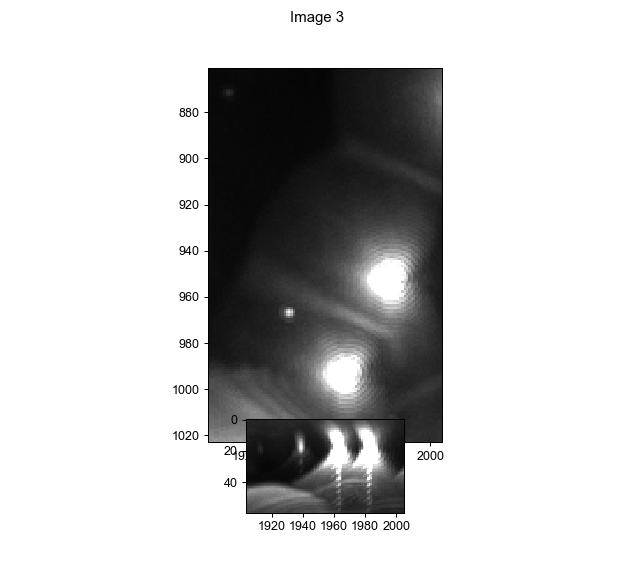

In [13]:
visual_tools.imshow_mark_3d_v2(ims)

In [15]:
%matplotlib widget
visual_tools.imshow_mark_3d_v2(ims)

<IPython.core.display.Javascript object>

In [124]:

_chrom_ims, _ = correct_fov_image(
    os.path.join(folders[0], fovs[fov_id]),
    [750],
    single_im_size=[50,2048,2048],
    drift_channel='561', corr_channels=[750,647,561],
    correction_folder=r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
    calculate_drift=False, warp_image=False,
)

chrom_im = _chrom_ims[0]

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_1\20201221-Acr_ctp08_P_brain\Before_clearing\H0R0\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048_const.pkl
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048_const.pkl
-- loading image from file:\\10.245.74.158\Chromatin_NAS_1\20201221-Acr_ctp08_P_brain\Before_clearing\H0R0\Conv_zscan_03.dax  in 9.705s
-- removing hot pixels for channels:['750', '647', '561'] in 28.800s
-- bleedthrough correction for channels: ['750', '647', '561'] in 21.345s
-- illumination correction for channels: 750, 647, 561, in 6.734s
-- generate translation function 

In [22]:
spot_list = [spot_tools.fitting.fit_fov_image(_im, _ch, th_seed=1000) for (_im,_ch) in zip(ims, channels)]

-- start fitting spots in channel:750, 38 seeded, 38 fitted in 80.517s.
-- start fitting spots in channel:647, 129 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:199: RuntimeWarning: overflow encountered in exp
  return 2./(1+np.exp(t_))-1.


129 fitted in 82.398s.
-- start fitting spots in channel:561, 273 seeded, 273 fitted in 84.313s.


<IPython.core.display.Javascript object>


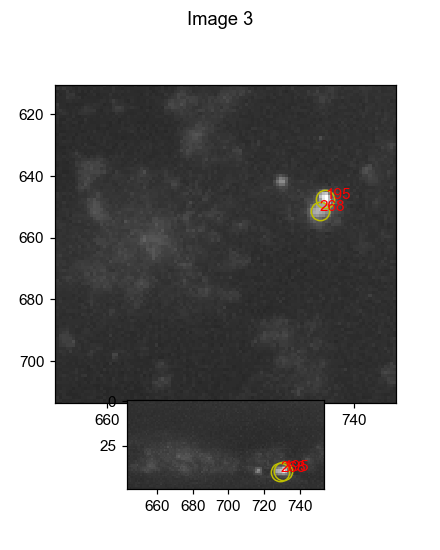

In [112]:
%matplotlib notebook
%matplotlib notebook
## visualize
_coords = []
_class_ids = []
for _i, _spots in enumerate(spot_list):
    _coords += [np.flipud(_coord[1:4]) for _coord in _spots]
    _class_ids += list(_i * np.ones(len(_spots), dtype=np.int))
coord_dict = {'coords':_coords,
              'class_ids':_class_ids,
             }

visual_tools.imshow_mark_3d_v2(ims, 
                               given_dic=coord_dict,
                               save_file=None,
                               )


In [110]:
# size
sz = 11

# sel spots
sel_cts_list = []
sel_ims_list = []
psf_list = []

for _im, _spots in zip(ims, spot_list):
    _sel_cts = []
    for _spot in _spots:
        #
        _dists = np.linalg.norm(_spots[:,1:4]-_spot[1:4], ord=1, axis=1)
        if np.min(_dists[_dists>0]) > sz:
            _sel_cts.append(_spot[1:4])
    _sel_cts = np.array(_sel_cts)
    # append
    sel_cts_list.append(_sel_cts)
    # im
    _ims_list = []
    for _ct in _sel_cts:
        _cim = crop_neighboring_area(_im, _ct, sz)
        _cim = _cim / np.max(_cim)
        _ims_list.append(_cim)
    # append
    sel_ims_list.append(_ims_list)

    # psf
    _psf = np.array(_ims_list).mean(0)
    _psf = _psf / np.sum(_psf)
    # append 
    psf_list.append(_psf)
                        



In [108]:
_psf

In [86]:
psf = np.array(sel_ims_list[0]).mean(0)
psf = psf / np.sum(psf)

<IPython.core.display.Javascript object>


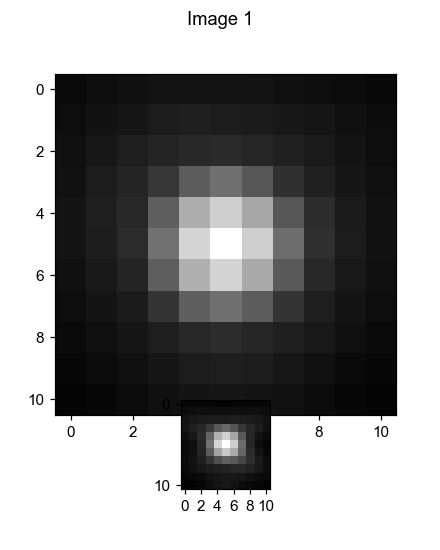

In [127]:
visual_tools.imshow_mark_3d_v2(psf_list)

In [34]:
from skimage.restoration import richardson_lucy

In [147]:
#%%timeit 
doconv_im = richardson_lucy(ims[0][:,:600,:600].max(0), psf_list[0].sum(0), 5, clip=False)

<IPython.core.display.Javascript object>


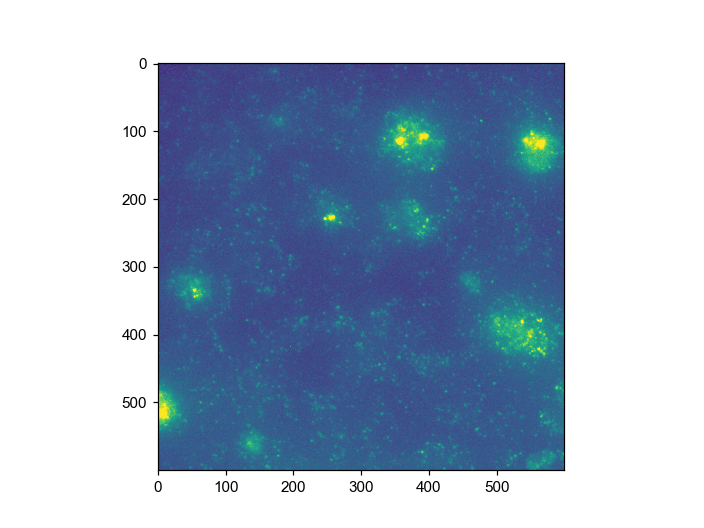

In [150]:
plt.figure()
plt.imshow(ims[0][:,:600,:600].max(0), vmin=200, vmax=500)

<IPython.core.display.Javascript object>


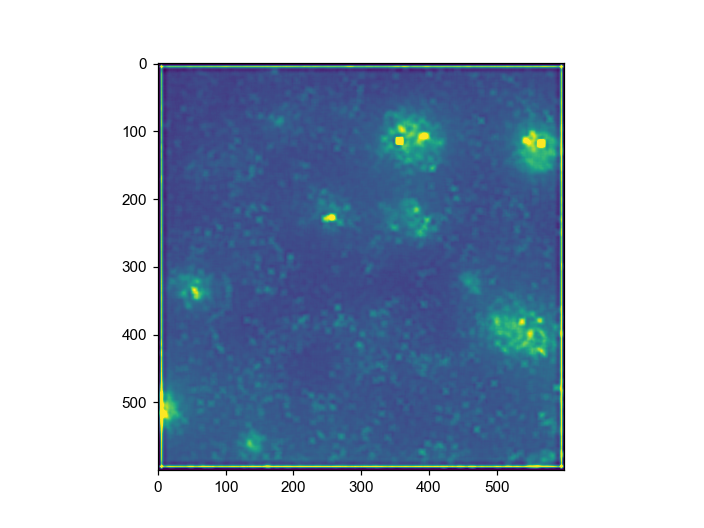

In [149]:
plt.figure()
plt.imshow(doconv_im, vmin=200, vmax=500)

In [121]:
#%%timeit 
doconv_im = richardson_lucy(ims[0][:,:600,:600], psf_list[0], 5, clip=False)

<IPython.core.display.Javascript object>


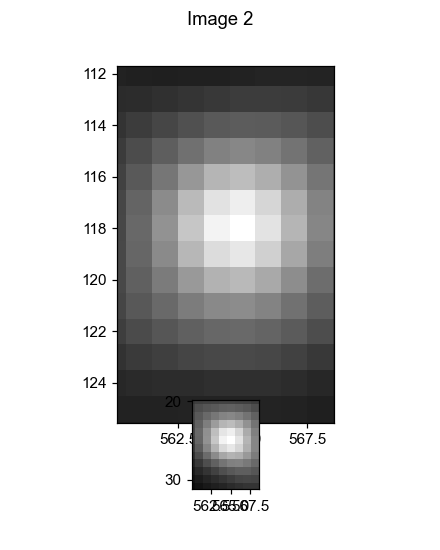

In [122]:
visual_tools.imshow_mark_3d_v2([ims[0][:,:600,:600], doconv_im])

In [125]:
doconv_chrom_im = richardson_lucy(chrom_im[:,:600,:600], psf_list[0], 5, clip=False)

<IPython.core.display.Javascript object>


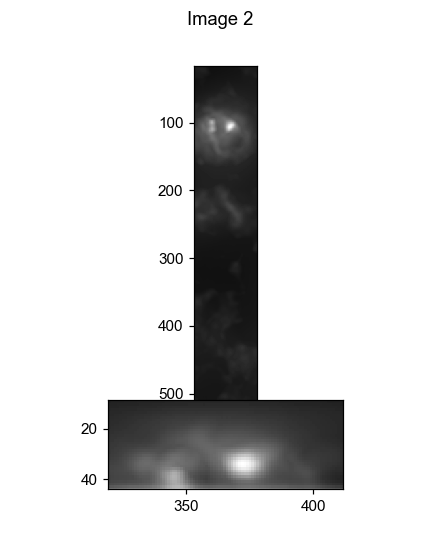

In [126]:
visual_tools.imshow_mark_3d_v2([chrom_im[:,:600,:600], doconv_chrom_im])

In [46]:
ims[0].dtype

dtype('uint16')